In [12]:

import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pprint import pprint
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)

In [14]:
print(tdidf_training_features.shape)
print(tdidf_test_features.shape)

(5760, 1000)
(720, 1000)


In [15]:
dt_0 = DecisionTreeClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(dt_0.get_params())

Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 8,
 'splitter': 'best'}


In [16]:
best_dt = dt_0
best_dt.fit(tdidf_training_features, tdidf_training_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best')

In [17]:
dt_pred = dt_0.predict(tdidf_test_features)

In [18]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(tdidf_training_labels, best_dt.predict(tdidf_training_features)))

The training accuracy is: 
0.9765625


In [19]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(tdidf_test_labels, dt_pred))

The test accuracy is: 
0.6597222222222222


In [20]:
# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,dt_pred))

Classification report
              precision    recall  f1-score   support

           1       0.74      0.71      0.72       130
           2       0.83      0.87      0.85       130
           3       0.62      0.61      0.61       113
           4       0.55      0.58      0.56       113
           5       0.57      0.57      0.57       110
           6       0.62      0.59      0.60       124

   micro avg       0.66      0.66      0.66       720
   macro avg       0.65      0.65      0.65       720
weighted avg       0.66      0.66      0.66       720



In [21]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

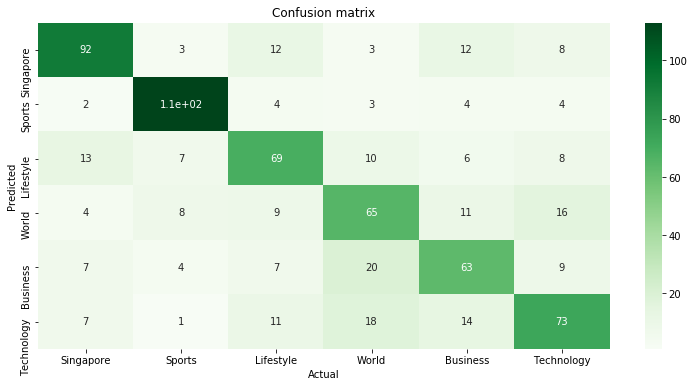

In [22]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, dt_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [23]:

base_model = DecisionTreeClassifier(random_state = 8)
base_model.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, base_model.predict(tdidf_test_features))

0.6597222222222222

In [24]:
best_dt.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, best_dt.predict(tdidf_test_features))

0.6597222222222222

In [25]:
d = {
     'Model': 'Decision Tree',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, best_dt.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, dt_pred)
}

df_models_dt = pd.DataFrame(d, index=[0])

In [26]:
df_models_dt

,Model,Training Set Accuracy,Test Set Accuracy
0,Decision Tree,0.976562,0.659722
